In [1]:
import pandas as pd
from pytz import utc
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [2]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_crs

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
...                                                              ...
2021-03 The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

[262 rows x 1 columns]

### Rating average/count by day

In [3]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()
# list(day_average.index)

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


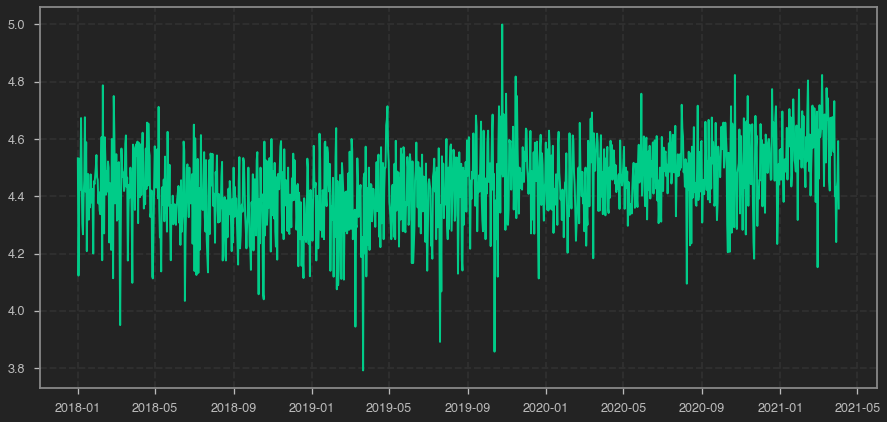

In [4]:
from jupyterthemes import jtplot

jtplot.style(gridlines='--', ticks=True,
             context='talk')

plt.figure(figsize=(15, 7))
plt.plot(day_average.index, day_average['Rating'], c='#00cc88')

### Rating average by week

In [5]:
data['Week'] = data['Timestamp'].dt.week
data

C:\Users\Vanquish\AppData\Local\Temp/ipykernel_18528/1988753933.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Timestamp'].dt.week


,Course Name,Timestamp,Rating,Comment,Month,Day,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04,2021-04-02,13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04,2021-04-02,13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04,2021-04-02,13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04,2021-04-02,13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04,2021-04-02,13
...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01,2018-01-01,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01,2018-01-01,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01,2018-01-01,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01,2018-01-01,1


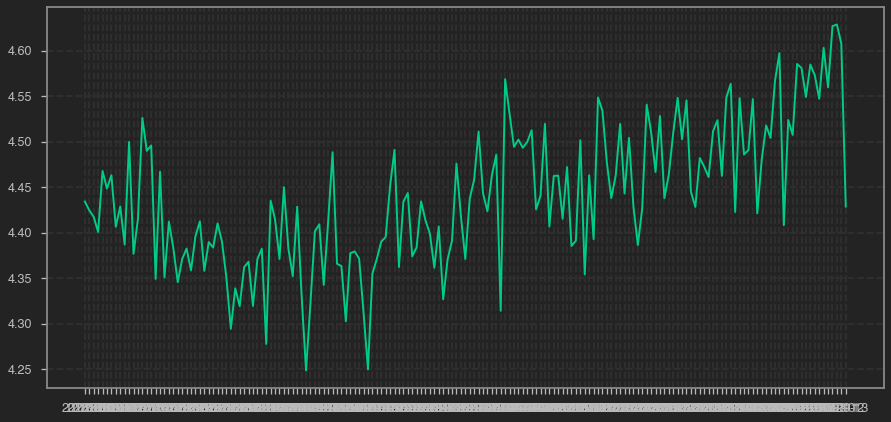

In [6]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()

plt.figure(figsize=(15, 7))
plt.plot(week_average.index, week_average['Rating'], c='#00cc88')

### Average rating by month

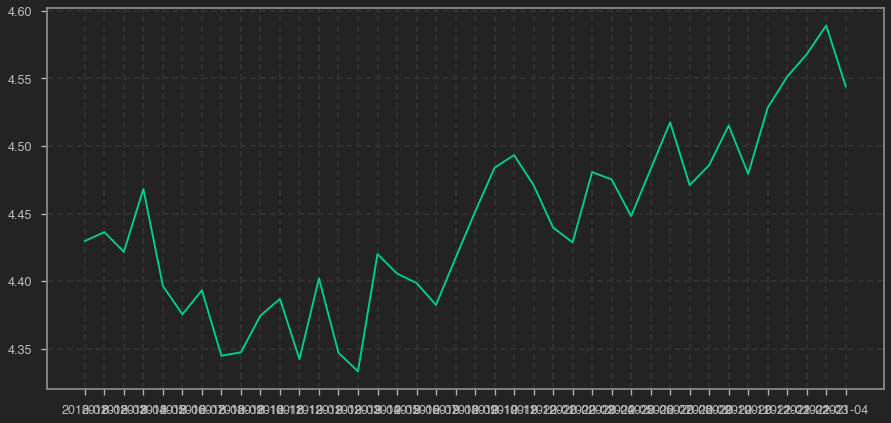

In [7]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
# month_average.head()

plt.figure(figsize=(15, 7))
plt.plot(month_average.index, month_average['Rating'], c='#00cc88')

### Average rating by month by course

In [8]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_crs

    

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
...                                                              ...
2021-03 The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

[262 rows x 1 columns]

In [9]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs[:20]


Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11                                                    NaN          
2018-12                                                    NaN          
2019-01                                                    NaN          
2019-02                                                    NaN          
2019-03                                                    NaN          
2019-04                                                    NaN          
2019-05                                                    NaN          
2019-06                                               4.722222          
2019-07                                               4.427273          
2019-08                                               4.416667          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   
2018-06                        4.631579   
2018-07                        4.159091   
2018-08                        4.411765   
2018-09                        4.173913   
2018-10                        4.464286   
2018-11                        4.462963   
2018-12                        3.985294   
2019-01                        4.033333   
2019-02                        4.3000

<AxesSubplot:xlabel='Month'>

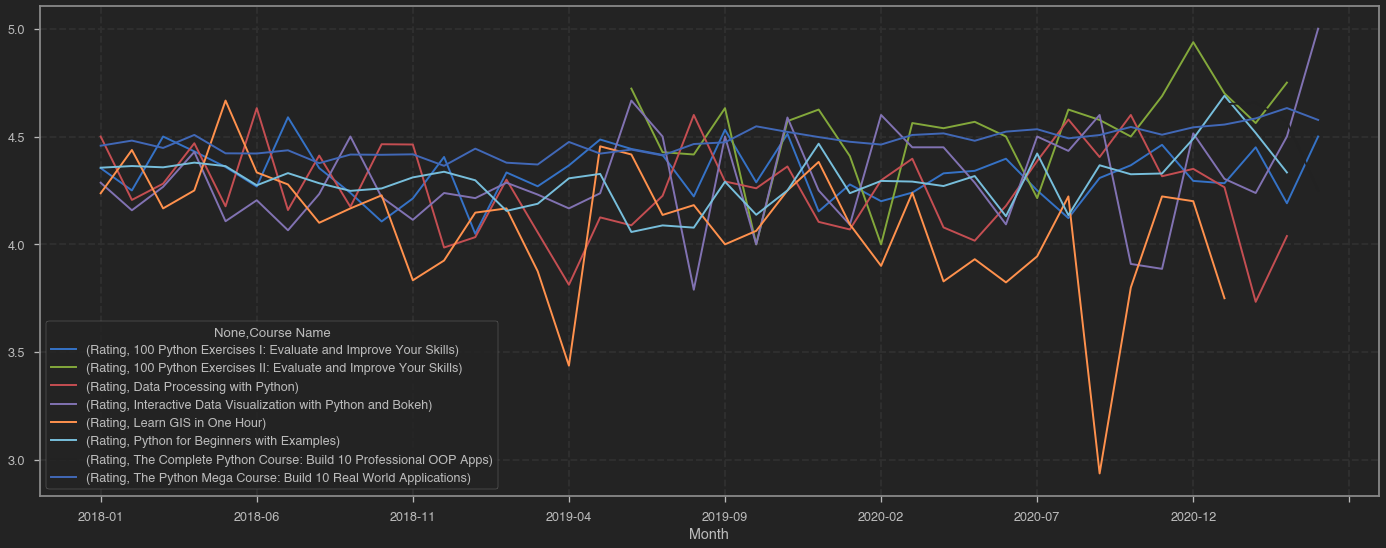

In [10]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()

jtplot.style(gridlines='--',
             context='talk',
             ticks=True)
month_average_crs.plot(figsize=(24, 9))

### What day are people the happiest?

#### My solution

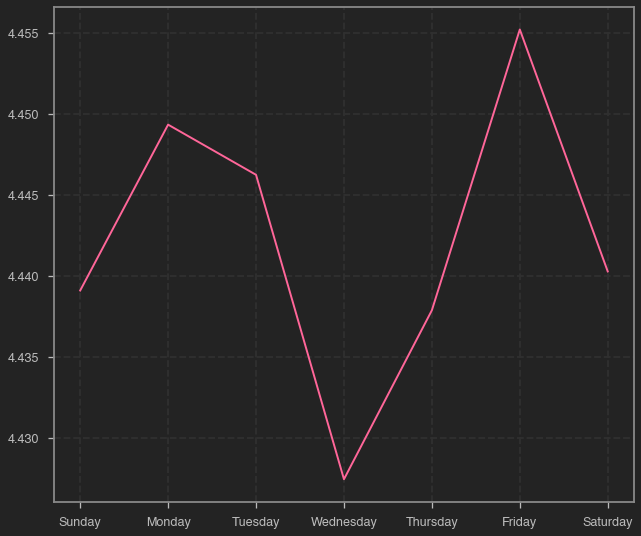

In [11]:
import numpy as np
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w').astype(np.int64)
# data['Daynumber']

weekday_average = data.groupby(['Weekday']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
# weekday_average

plt.plot(weekday_average.index, weekday_average['Rating'], c='#ff6699')
# 00cc88

#### Ardit's way

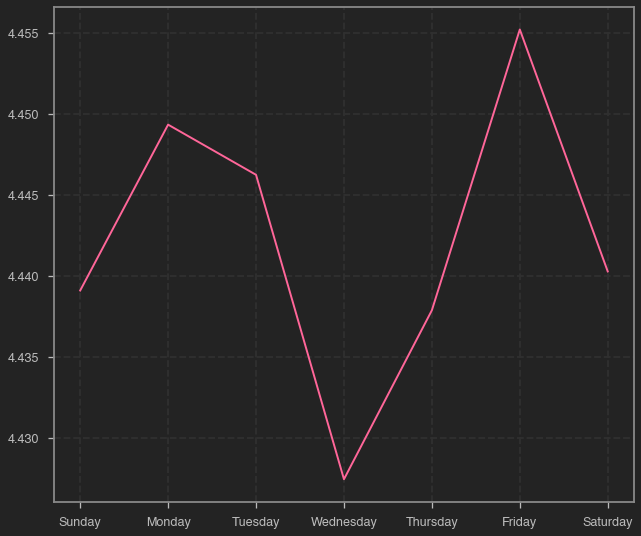

In [12]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
# data['Daynumber']

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
# weekday_average

plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'], c='#ff6699')
# 00cc88

In [13]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

### Number of ratings by course

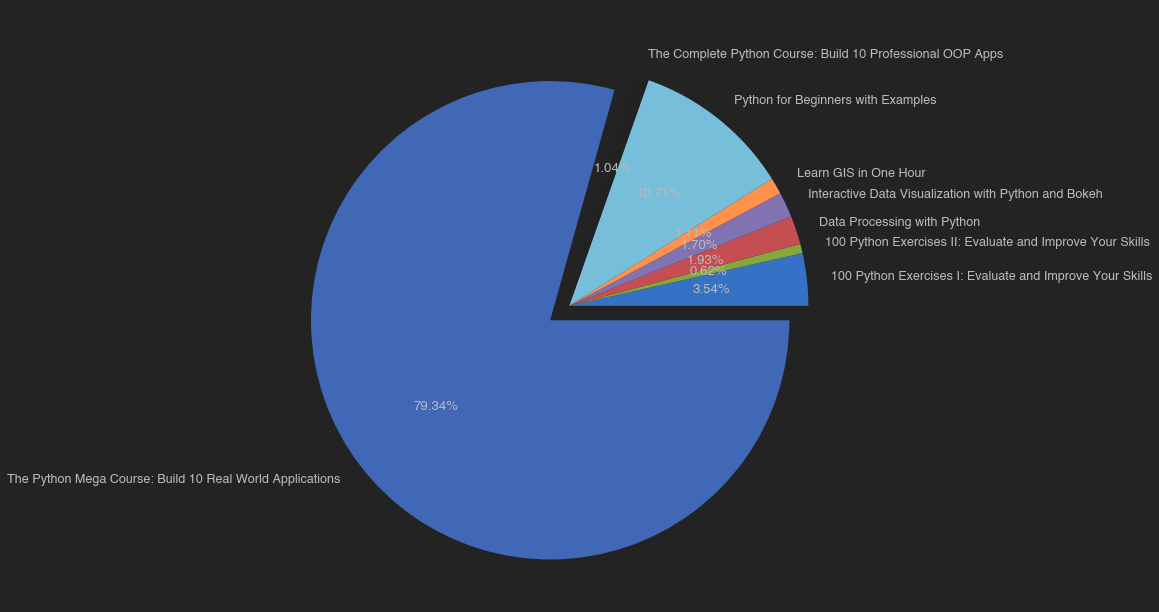

In [14]:
share = data.groupby(['Course Name'])['Rating'].count()
# share

my_explode = [0, 0, 0, 0, 0, 0, 0, 0.1]

plt.figure(figsize=(11, 11))
plt.pie(share, labels=share.index ,explode=my_explode, autopct='%1.2f%%')
plt.show()